# What does the Knowledge Neuron Thesis Have to do with Knowledge?

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import ttest_ind

from kn_code.patch import unpatch_ff_layers
from kn_code.plot import pre_post_edit_probs, plot
from kn_code import load_model

/fs01/projects/rl_probe/release_kn/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Suppress KN

In [2]:
kn = load_model('bert-base-cased')

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


In [3]:
dets = [
    'these', 'those', 'two', 'both', 'multiple', 'several', 'various',
    'this', 'that', 'one', 'a', 'an', 'every', 'unique', 'single', 'sole',
    'the', 'any', 'all', 'some', 'my', 'our', 'unified', 'scattered',
]

neurons = [(9, 1094)]
blimp_dets = ['these', 'those']
blimp_idxs = kn.tokenizer.convert_tokens_to_ids(dets)
tick_range = torch.arange(-2,6,1)
suptitle = 'Effect of suppressing the plural neuron $w^{(9)}_{1094}$.'

prompt_data = kn.get_blimp_prompts('determiner_noun_agreement_2')
filter_fn = lambda p, g, b: g in blimp_dets

In [4]:
pre_probs, post_probs = pre_post_edit_probs(kn, neurons, prompt_data, filter_fn, blimp_idxs)

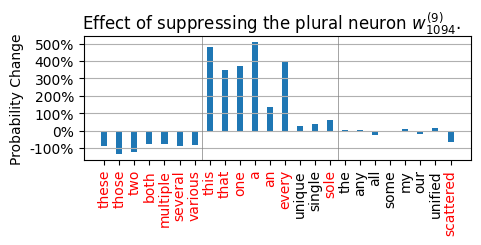

In [5]:
fig = plot(
    torch.stack(pre_probs),
    torch.stack(post_probs),
    dets,
    (5,1.6),
    suptitle,
    tick_range=tick_range,
    grey_vlines=[6.5, 15.5],
)